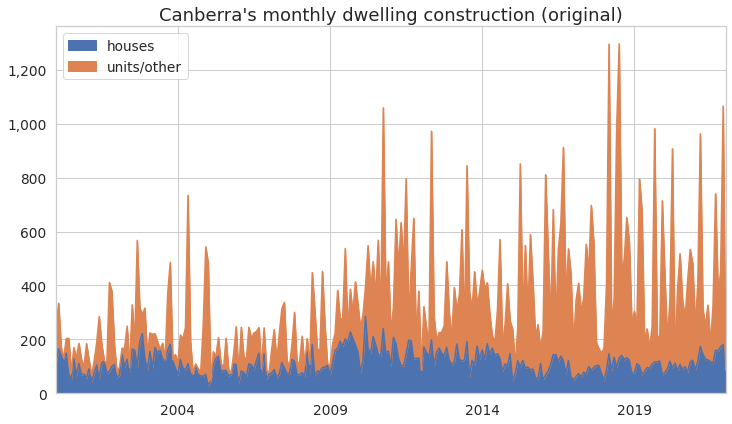

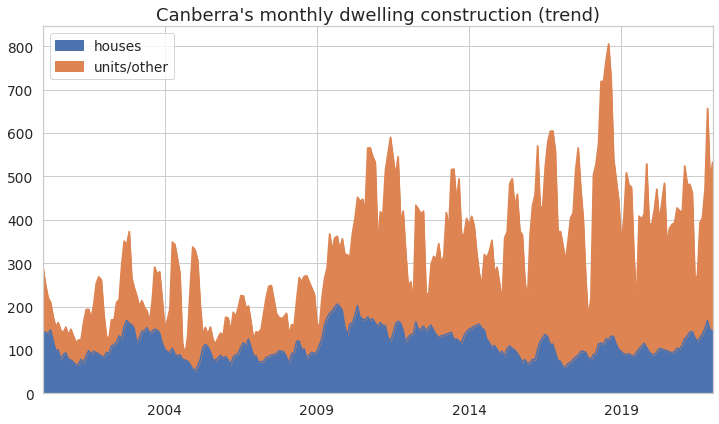

In [152]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, matplotlib.dates as mdates, matplotlib.ticker as ticker
sns.set(style="whitegrid", font_scale=1.25)

data = pd.read_excel("8731007.xlsx", sheet_name=1, usecols=[0, 8], names=["month", "dwellings"], skiprows=9, parse_dates=["month"])

houses = pd.read_excel("8731008.xlsx", sheet_name=1, usecols=[0, 8], names=["month", "houses"], skiprows=9, parse_dates=["month"])
data["houses"] = houses["houses"]
data["units/other"] = data["dwellings"] - data["houses"]
data = data[data["month"] > pd.to_datetime("1999-12-31")]

ax = data.set_index("month")[["houses", "units/other"]].plot(
    figsize=(12, 6.75),
    kind="area"
)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.0f}"))
plt.xlabel(None)
plt.title("Canberra's monthly dwelling construction (original)", fontsize="large")

df = pd.DataFrame(columns=["month", "houses", "units/other"])
for i in data.index:
    trend = data.loc[max(0, i - 2):i + 1]
    df.loc[i] = [
        data.at[i, "month"],
        trend["houses"].mean(),
        trend["units/other"].mean(),
    ]

ax = df.set_index("month")[["houses", "units/other"]].plot(
    figsize=(12, 6.75),
    kind="area"
)
plt.xlabel(None)
plt.title("Canberra's monthly dwelling construction (trend)", fontsize="large")

df.to_csv("housing_construction.csv", index=False)

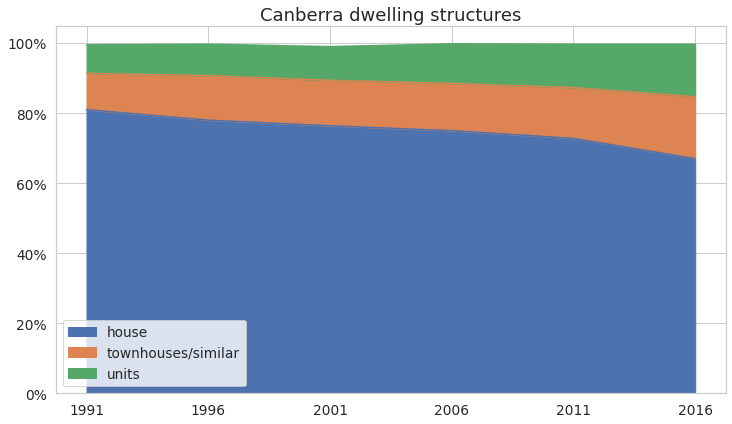

In [175]:
structures = pd.DataFrame(columns=["census", "house", "townhouses/similar", "units"])
structures.loc[len(structures)] = ["1991", 73632 / (91460-572), 9423 / (91460-572), 7422 / (91460-572)]
structures.loc[len(structures)] = ["1996", 82477 / (106675-947), 13444 / (106675-947), 9497 / (106675-947)]
structures.loc[len(structures)] = ["2001", .764, .13, .096]
structures.loc[len(structures)] = ["2006", .75, .135, .113]
structures.loc[len(structures)] = ["2011", .728, .145, .124]
structures.loc[len(structures)] = ["2016", .67, .177, .15]
# structures["census"] = structures["census"].astype("int")
structures.set_index("census", inplace=True)

ax = structures.plot(
    figsize=(12, 6.75),
    kind="area"
)
plt.xlabel(None)
plt.title("Canberra dwelling structures", fontsize="large")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, 0))

structures.to_csv("dwelling_structures.csv")

In [ ]:
st